# HR ANALYTICS PROJECT- Understanding the Attrition in HR


In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#IBM HR_attrition_rate dataset
hr=pd.read_csv("IBM_hr_analytics_employee_attrition_performance.csv")
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
 hr.shape

(1470, 35)

In [4]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Label Encoding:

In [6]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
hr['Attrition']=le.fit_transform(hr['Attrition'])
hr['BusinessTravel']=le.fit_transform(hr['BusinessTravel'])
hr['Department']=le.fit_transform(hr['Department'])
hr['EducationField']=le.fit_transform(hr['EducationField'])
hr['Gender']=le.fit_transform(hr['Gender'])
hr['JobRole']=le.fit_transform(hr['JobRole'])
hr['MaritalStatus']=le.fit_transform(hr['MaritalStatus'])
hr['Over18']=le.fit_transform(hr['Over18'])
hr['OverTime']=le.fit_transform(hr['OverTime'])
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


# EDA:

# Visualization:

Countplot:

35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


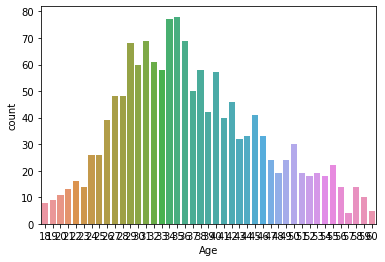

In [7]:
sns.countplot(hr["Age"])
print(hr["Age"].value_counts())

We can see that maximum number of employees are in age around 27 to 35.

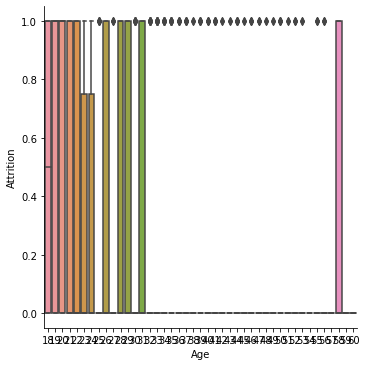

In [8]:
sns.catplot(x="Age",y="Attrition",kind="box",data=hr)

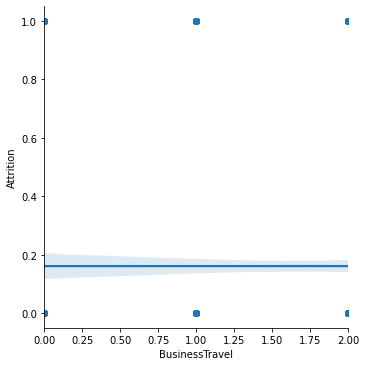

In [9]:
sns.lmplot(x="BusinessTravel",y="Attrition",data=hr)

<AxesSubplot:xlabel='Age', ylabel='count'>

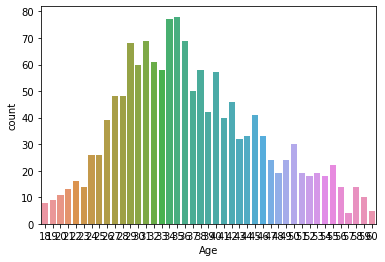

In [10]:
sns.countplot(hr["Age"])

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

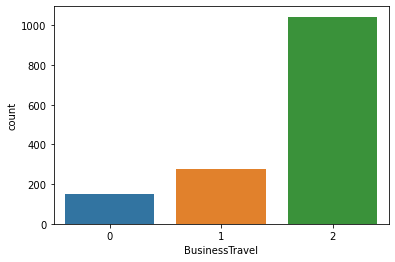

In [11]:
sns.countplot(hr["BusinessTravel"])

<AxesSubplot:xlabel='DailyRate', ylabel='count'>

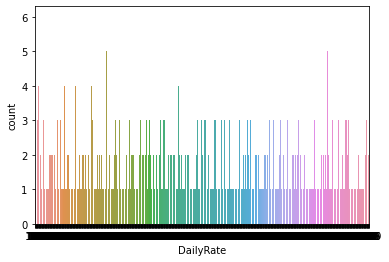

In [12]:
sns.countplot(hr["DailyRate"])

<AxesSubplot:xlabel='Department', ylabel='count'>

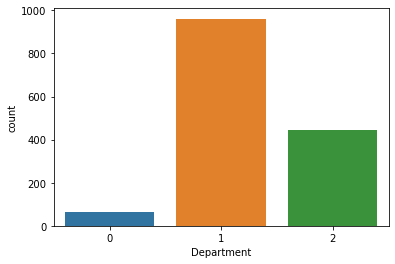

In [13]:
sns.countplot(hr["Department"])

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

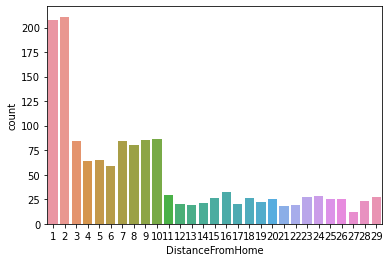

In [14]:
sns.countplot(hr["DistanceFromHome"])

<AxesSubplot:xlabel='Education', ylabel='count'>

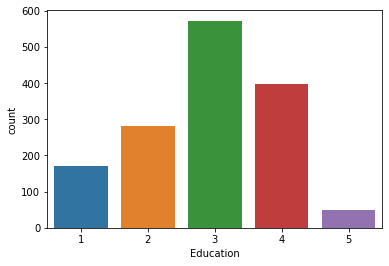

In [15]:
sns.countplot(hr["Education"])

<AxesSubplot:xlabel='EducationField', ylabel='count'>

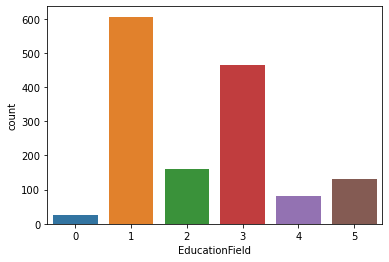

In [16]:
sns.countplot(hr["EducationField"])

<AxesSubplot:xlabel='EmployeeCount', ylabel='count'>

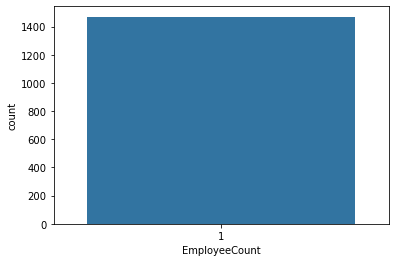

In [17]:
sns.countplot(hr["EmployeeCount"])

<AxesSubplot:xlabel='EmployeeNumber', ylabel='count'>

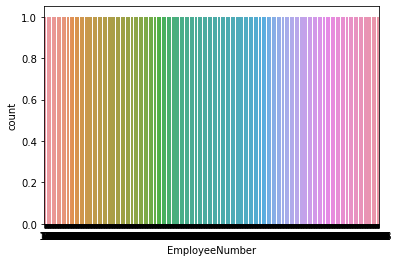

In [18]:
sns.countplot(hr["EmployeeNumber"])

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

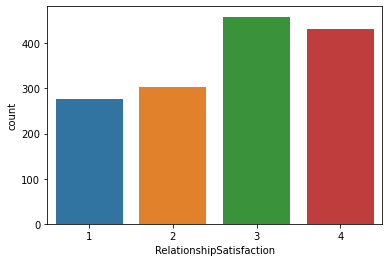

In [19]:
sns.countplot(hr["RelationshipSatisfaction"])

<AxesSubplot:xlabel='StandardHours', ylabel='count'>

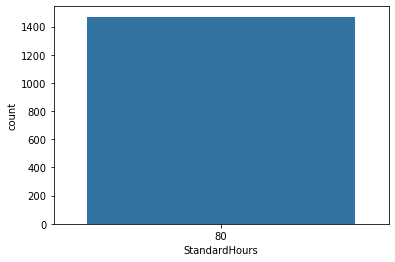

In [20]:
sns.countplot(hr["StandardHours"])

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

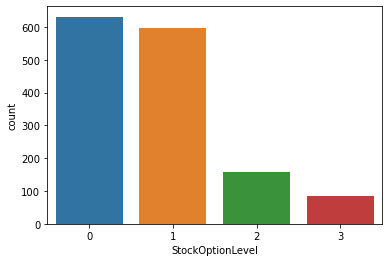

In [21]:
sns.countplot(hr["StockOptionLevel"])

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

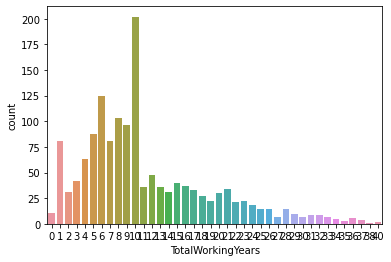

In [22]:
sns.countplot(hr["TotalWorkingYears"])

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

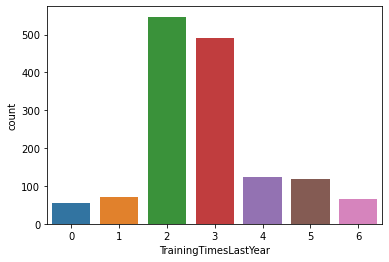

In [23]:
sns.countplot(hr["TrainingTimesLastYear"])

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

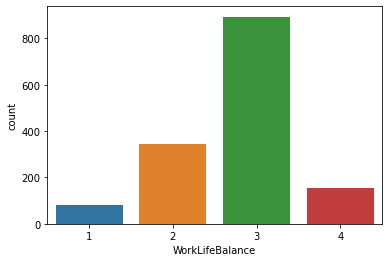

In [24]:
sns.countplot(hr["WorkLifeBalance"])

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

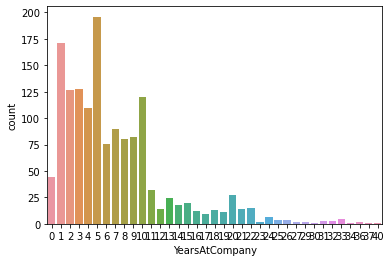

In [25]:
sns.countplot(hr["YearsAtCompany"])

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

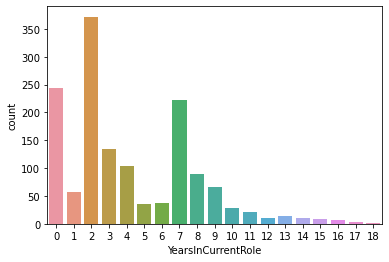

In [26]:
sns.countplot(hr["YearsInCurrentRole"])

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

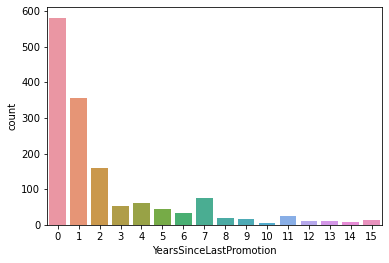

In [27]:
sns.countplot(hr["YearsSinceLastPromotion"])

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

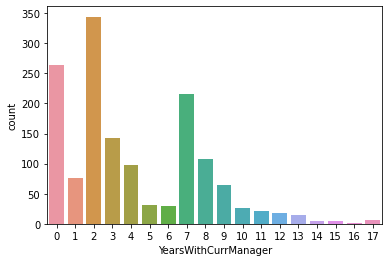

In [28]:
sns.countplot(hr["YearsWithCurrManager"])

In [29]:
hr.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

# Correlation:

In [30]:
hr.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


Correlation using heatmap;

<AxesSubplot:>

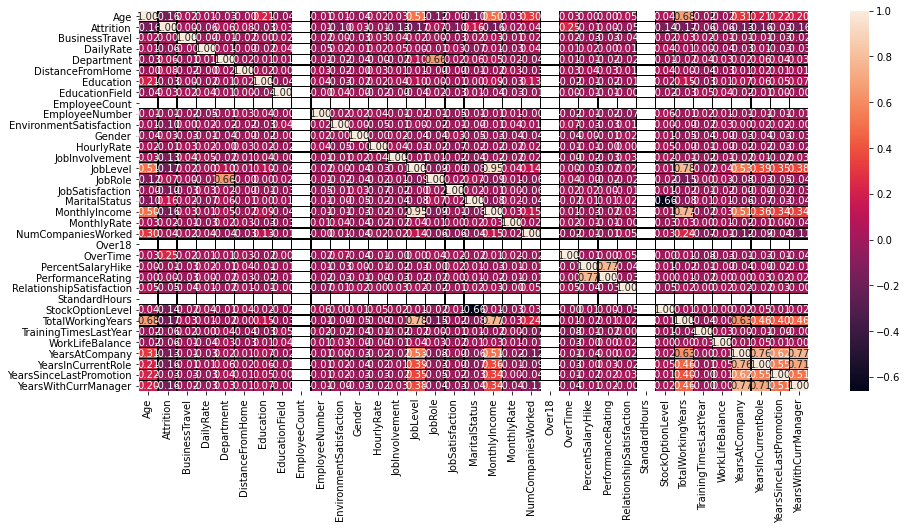

In [31]:
plt.figure(figsize=(15,7))
sns.heatmap(hr.corr(),annot=True,linewidth=0.2,linecolor="black",fmt='.2f')

Outcome Of Correlation:

Column Age is 15% negatively correlated with the target column Attrition.
Business Travel is 0.0074% correlated with the target column Attrition.
DailyRate is 5% negatively correlated with the target column Attrition.
Department is 6% correlated with the target column Attrition.
DistanceFromHome is 7% correlated with the target column Attrition.
Education is 3% negatively correlated with the target column Attrition.
Education Field is 2% correlated with the target column Attrition.
EmployeeCount is 0% correlated with the target column Attrition.
EmployeeNumber is 1% negatively correlated with the target column Attrition.
EnvironmentSatisfaction is 10% negatively correlated with the target column Attrition.
Gender is 2% correlated with the target column Attrition.
HourlyRate is 0.6% correlated with the target column Attrition.
JobInvolvement is 13% negatively correlated with the target column Attrition.
JobLevel is 16% negatively correlated with the target column Attrition.
JobRole is 6% correlated with the target column Attrition.
JobSatisfaction is 10% negatively correlated with the target column Attrition.
MaritalStatus is 16% correlated with the target column Attrition.
MonthlyIncome is 15% negatively correlated with the target column Attrition.
MonthlyRate is 1.5% correlated with the target column Attrition.
NumberCompaniesWorked is 4.3% correlated with the target column Attrition.
Over18 is 0% correlated with the target column Attrition.
OverTime is 24% correlated with the target column Attrition.
PercentSalaryHike is 1.3% correlated with the target column Attrition.
PerformanceRating is 0.2% correlated with the target column Attrition.
RelationshipSatisfaction is 1.45% negatively correlated with the target column Attrition.
StandardHours is 0% correlated with the target column Attrition.
StockOptionLevel is 13% negatively correlated with the target column Attrition.
TotalWorkingYears is 17% negatively correlated with the target column Attrition.
TrainingTimesLastYear is 5% negatively correlated with the target column Attrition.
WorkLifeBalance is 6% negatively correlated with the target column Attrition.
YearsAtCompany is 13% negatively correlated with the target column Attrition.
YearsInCurrentRole is 16% negatively correlated with the target column Attrition.
YearsSinceLastPromotion is 3% correlated with the target column Attrition.
YearsWithCurrManager is 15% negatively correlated with the target column Attrition.

Max.Correlation:Overtime
    
Min.Correlation:BusinessTravel

No Correlation:EmployeeCount,StandardHours,Over18.

# Describe of Dataset:

In [32]:
hr.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


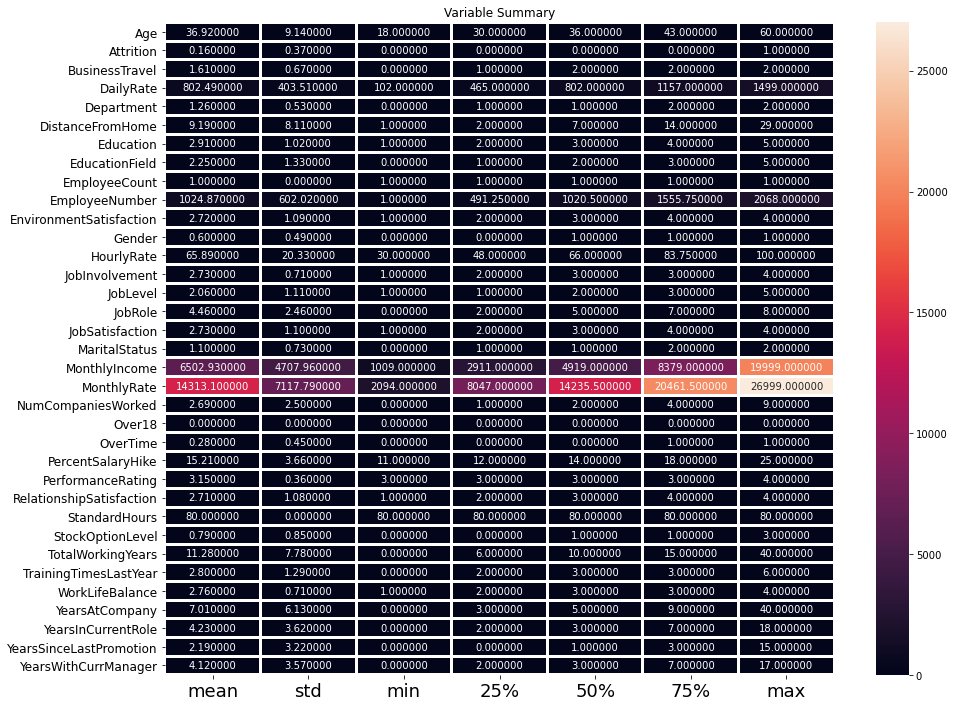

In [33]:
plt.figure(figsize=(15,12))
sns.heatmap(round(hr.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

Outcome Of Desrcribe of Dataset:

In [34]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

# Outliers Checking:

Box Plot:

<AxesSubplot:>

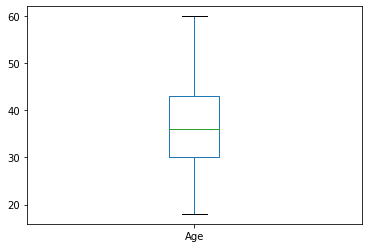

In [35]:
hr['Age'].plot.box()

<AxesSubplot:>

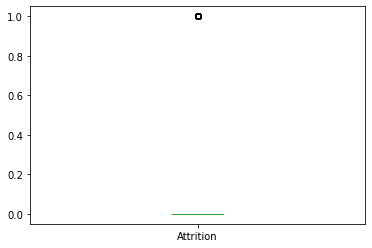

In [36]:
hr['Attrition'].plot.box()

<AxesSubplot:>

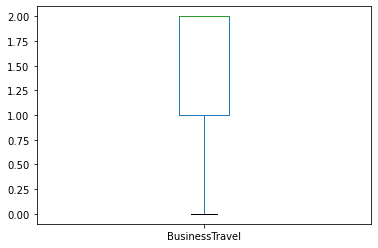

In [37]:
hr['BusinessTravel'].plot.box()

<AxesSubplot:>

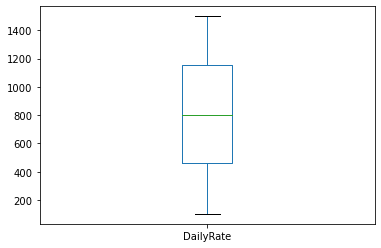

In [38]:
hr['DailyRate'].plot.box()

<AxesSubplot:>

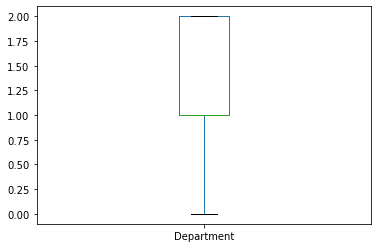

In [39]:
hr['Department'].plot.box()

<AxesSubplot:>

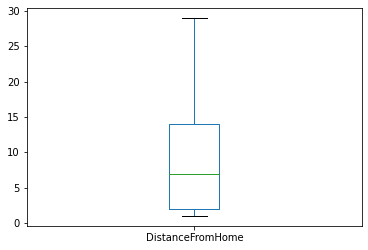

In [40]:
hr['DistanceFromHome'].plot.box()

<AxesSubplot:>

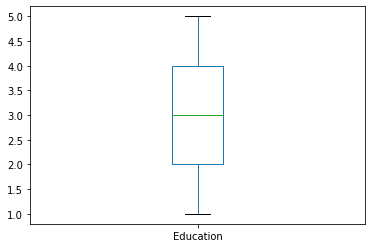

In [41]:
hr['Education'].plot.box()

<AxesSubplot:>

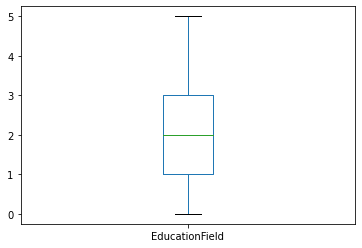

In [42]:
hr['EducationField'].plot.box()

<AxesSubplot:>

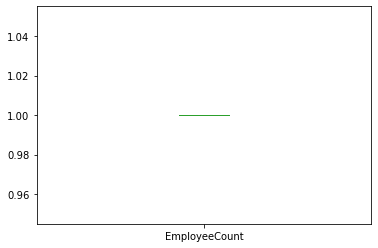

In [43]:
hr['EmployeeCount'].plot.box()

<AxesSubplot:>

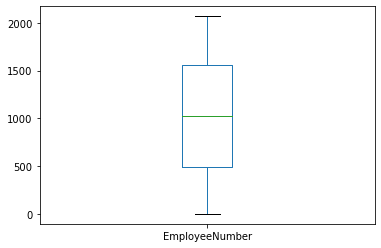

In [44]:
hr['EmployeeNumber'].plot.box()

<AxesSubplot:>

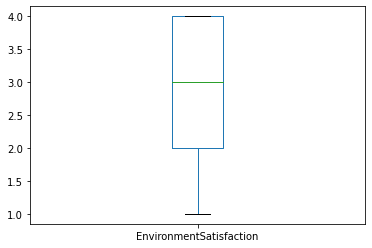

In [45]:
hr['EnvironmentSatisfaction'].plot.box()

<AxesSubplot:>

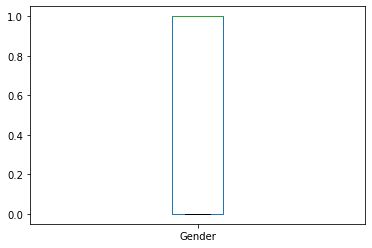

In [46]:
hr['Gender'].plot.box()

<AxesSubplot:>

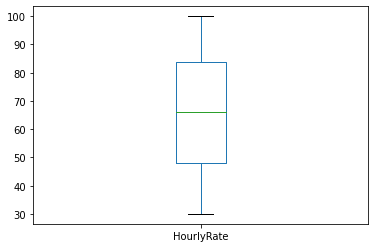

In [47]:
hr['HourlyRate'].plot.box()

<AxesSubplot:>

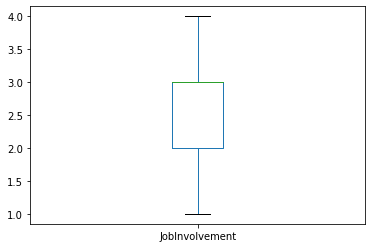

In [48]:
hr['JobInvolvement'].plot.box()

<AxesSubplot:>

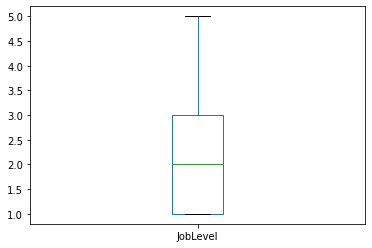

In [49]:
hr['JobLevel'].plot.box()

<AxesSubplot:>

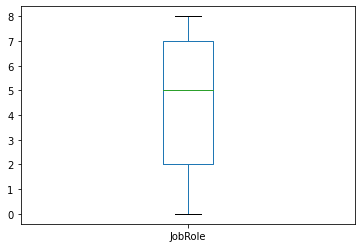

In [50]:
hr['JobRole'].plot.box()

<AxesSubplot:>

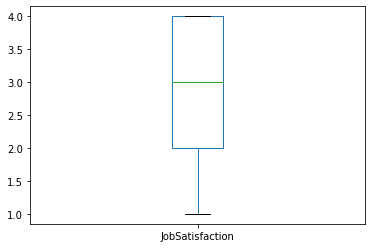

In [51]:
hr['JobSatisfaction'].plot.box()

<AxesSubplot:>

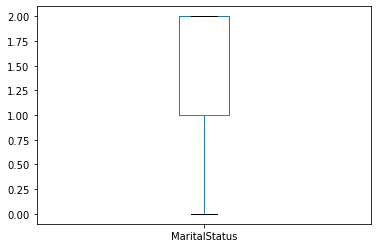

In [52]:
hr['MaritalStatus'].plot.box()

<AxesSubplot:>

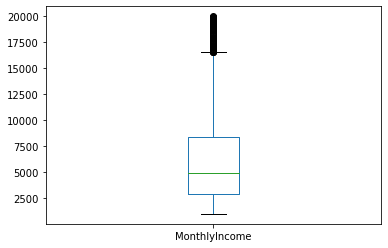

In [53]:
hr['MonthlyIncome'].plot.box()

<AxesSubplot:>

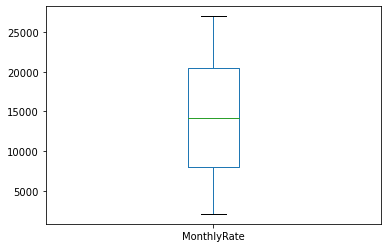

In [54]:
hr['MonthlyRate'].plot.box()

<AxesSubplot:>

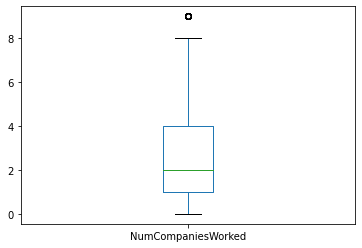

In [55]:
hr['NumCompaniesWorked'].plot.box()

<AxesSubplot:>

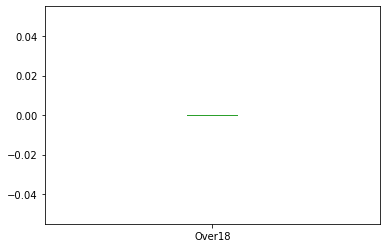

In [56]:
hr['Over18'].plot.box()

<AxesSubplot:>

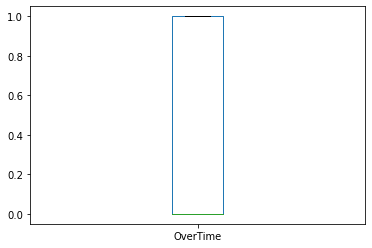

In [57]:
hr['OverTime'].plot.box()

<AxesSubplot:>

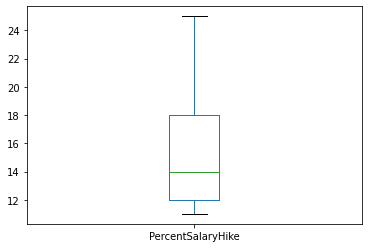

In [58]:
hr['PercentSalaryHike'].plot.box()

<AxesSubplot:>

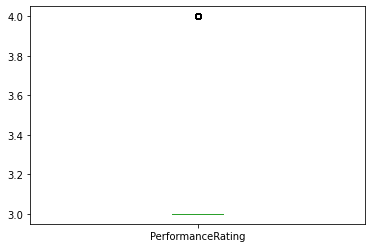

In [59]:
hr['PerformanceRating'].plot.box()

<AxesSubplot:>

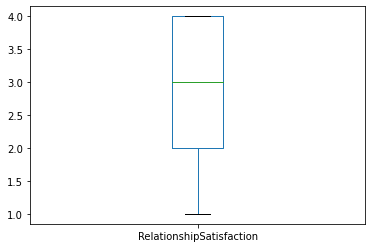

In [60]:
hr['RelationshipSatisfaction'].plot.box()

<AxesSubplot:>

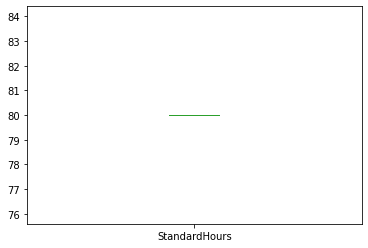

In [61]:
hr['StandardHours'].plot.box()

<AxesSubplot:>

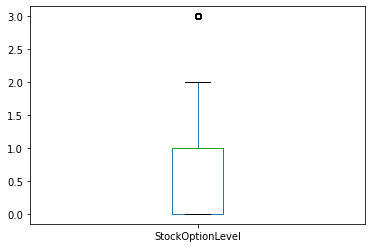

In [62]:
hr['StockOptionLevel'].plot.box()

<AxesSubplot:>

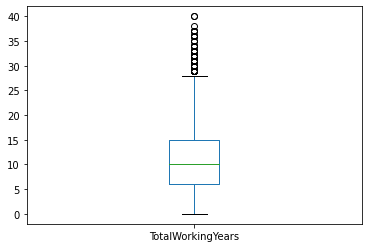

In [63]:
hr['TotalWorkingYears'].plot.box()

<AxesSubplot:>

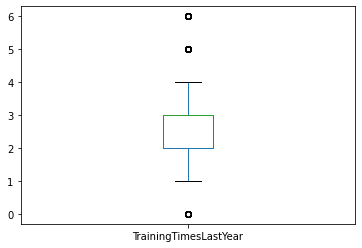

In [64]:
hr['TrainingTimesLastYear'].plot.box()

<AxesSubplot:>

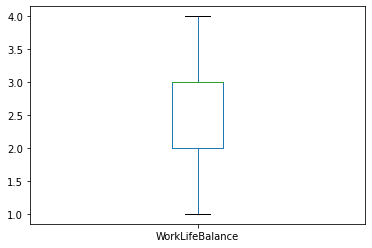

In [65]:
hr['WorkLifeBalance'].plot.box()

<AxesSubplot:>

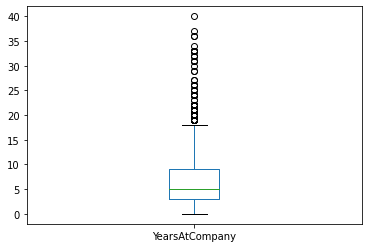

In [66]:
hr['YearsAtCompany'].plot.box()

<AxesSubplot:>

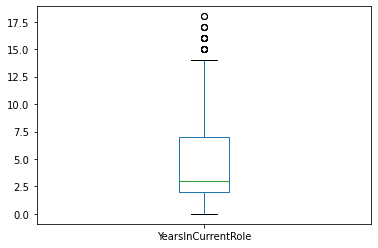

In [67]:
hr['YearsInCurrentRole'].plot.box()

<AxesSubplot:>

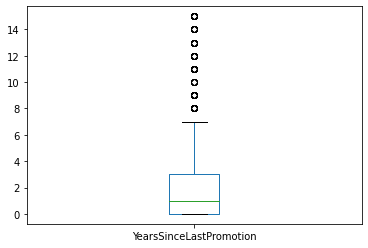

In [68]:
hr['YearsSinceLastPromotion'].plot.box()

<AxesSubplot:>

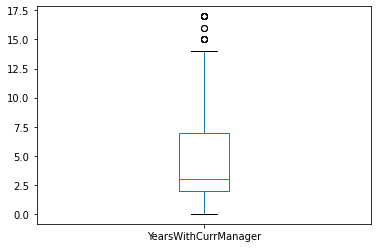

In [69]:
hr['YearsWithCurrManager'].plot.box()

From the above outcome we can see that columns[Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HorlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,Over18,OverTime,PercentSalaryHike,RElationshipSatisfaction,StandardHours,WorkLifeBalance] has no outliers.

columns[Attrition,PerformanceRating,NumCompaniesWorked,StockOptionLevel,YearsInCurrentRole,YearsWithCurrManager] has less outliers and 

columns[MonthlyIncome,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion] has more outliers.

# Skewness:

In [70]:
hr.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
S

Outcome Of Skewness:

Skewness threshold is taken as +/-0.5.

# Normal Distribution Curve:

<AxesSubplot:xlabel='Age', ylabel='Density'>

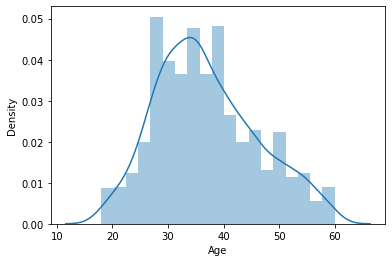

In [71]:
sns.distplot(hr['Age'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='Attrition', ylabel='Density'>

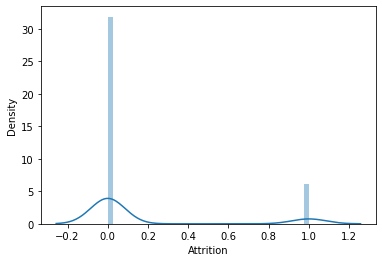

In [72]:
sns.distplot(hr['Attrition'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='BusinessTravel', ylabel='Density'>

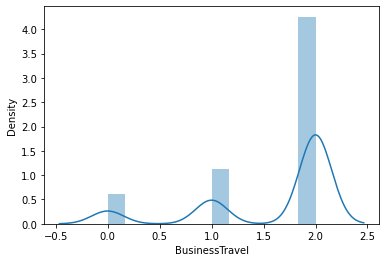

In [73]:
sns.distplot(hr['BusinessTravel'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

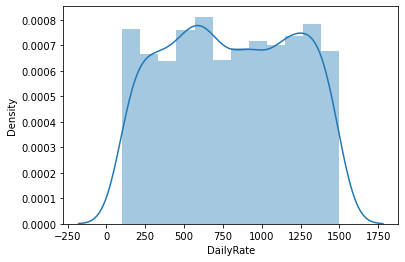

In [74]:
sns.distplot(hr['DailyRate'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='Department', ylabel='Density'>

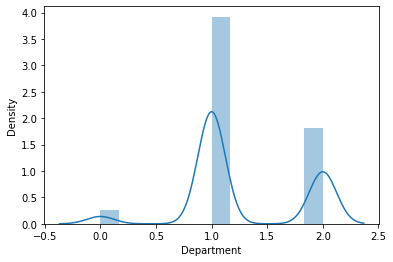

In [75]:
sns.distplot(hr['Department'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

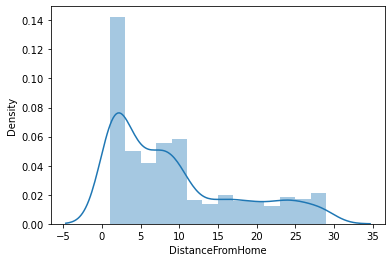

In [76]:
sns.distplot(hr['DistanceFromHome'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='Education', ylabel='Density'>

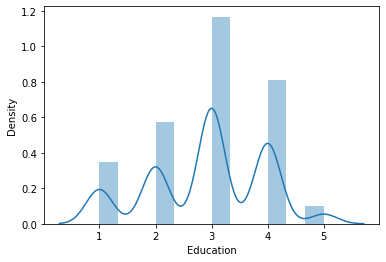

In [77]:
sns.distplot(hr['Education'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='EducationField', ylabel='Density'>

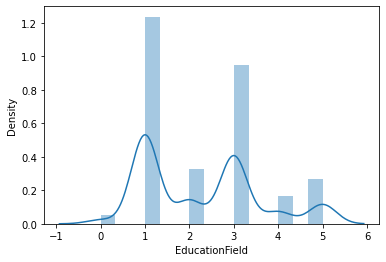

In [78]:
sns.distplot(hr['EducationField'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='EmployeeCount', ylabel='Density'>

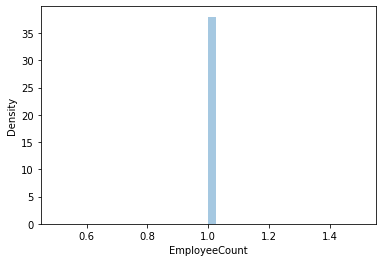

In [79]:
sns.distplot(hr['EmployeeCount'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='EmployeeNumber', ylabel='Density'>

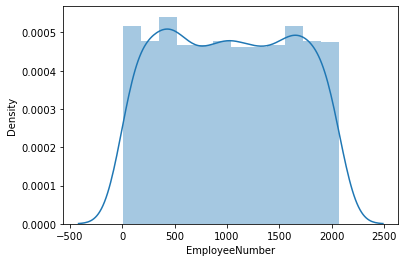

In [80]:
sns.distplot(hr['EmployeeNumber'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='Density'>

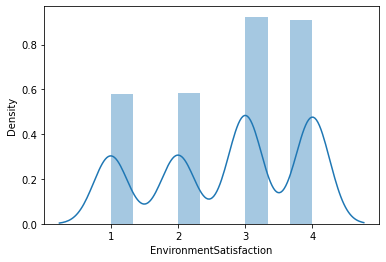

In [81]:
sns.distplot(hr['EnvironmentSatisfaction'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='Gender', ylabel='Density'>

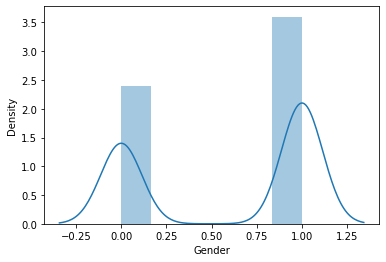

In [82]:
sns.distplot(hr['Gender'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

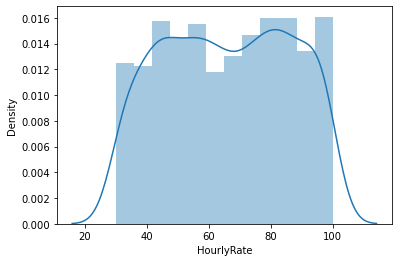

In [83]:
sns.distplot(hr['HourlyRate'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='JobInvolvement', ylabel='Density'>

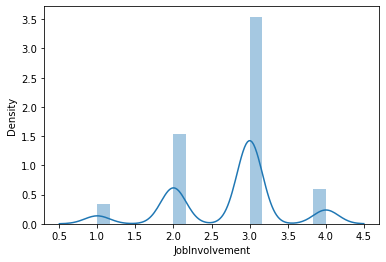

In [84]:
sns.distplot(hr['JobInvolvement'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='JobLevel', ylabel='Density'>

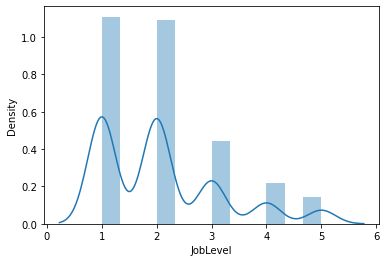

In [85]:
sns.distplot(hr['JobLevel'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='JobRole', ylabel='Density'>

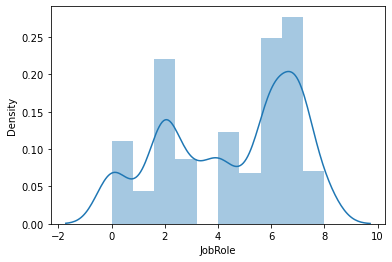

In [86]:
sns.distplot(hr['JobRole'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Density'>

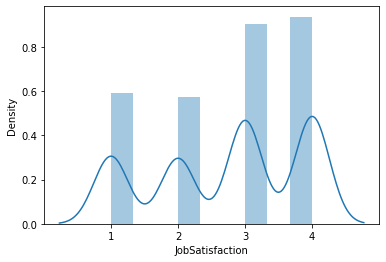

In [87]:
sns.distplot(hr['JobSatisfaction'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='MaritalStatus', ylabel='Density'>

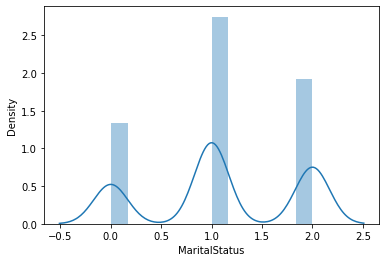

In [88]:
sns.distplot(hr['MaritalStatus'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

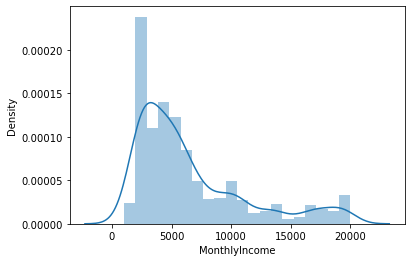

In [89]:
sns.distplot(hr['MonthlyIncome'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='MonthlyRate', ylabel='Density'>

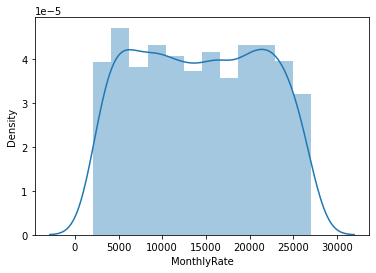

In [90]:
sns.distplot(hr['MonthlyRate'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Density'>

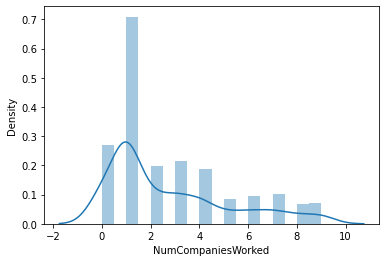

In [91]:
sns.distplot(hr['NumCompaniesWorked'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='Over18', ylabel='Density'>

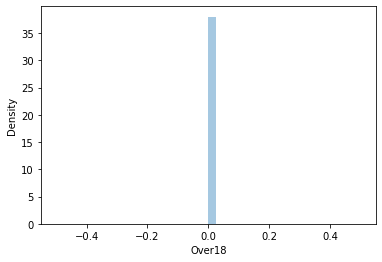

In [92]:
sns.distplot(hr['Over18'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='OverTime', ylabel='Density'>

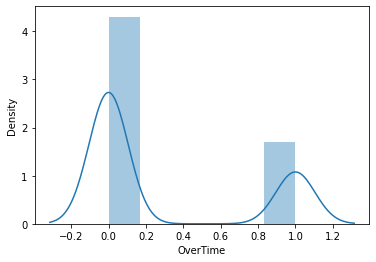

In [93]:
sns.distplot(hr['OverTime'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='Density'>

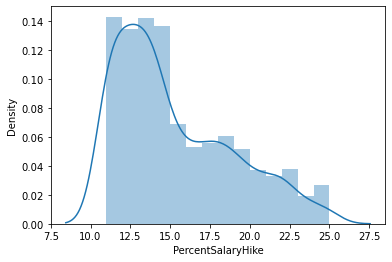

In [94]:
sns.distplot(hr['PercentSalaryHike'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='PerformanceRating', ylabel='Density'>

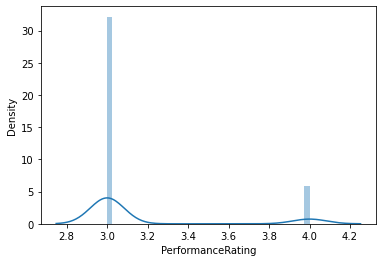

In [95]:
sns.distplot(hr['PerformanceRating'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='Density'>

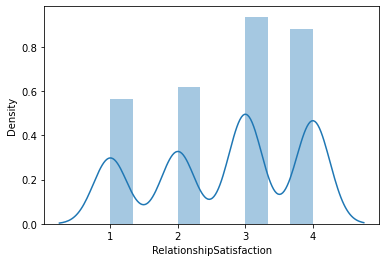

In [96]:
sns.distplot(hr['RelationshipSatisfaction'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='StandardHours', ylabel='Density'>

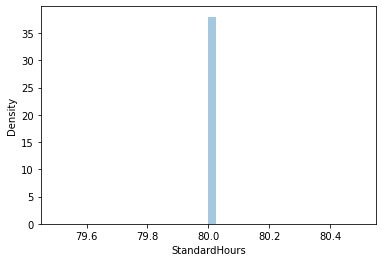

In [97]:
sns.distplot(hr['StandardHours'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='StockOptionLevel', ylabel='Density'>

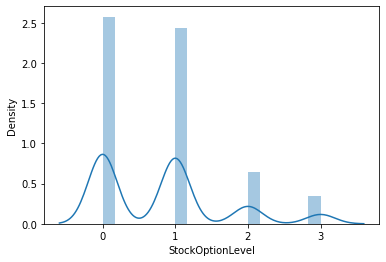

In [98]:
sns.distplot(hr['StockOptionLevel'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

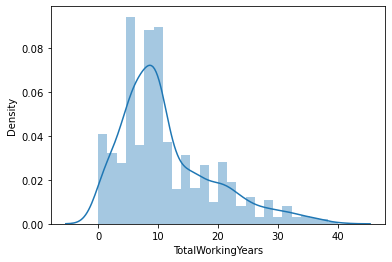

In [99]:
sns.distplot(hr['TotalWorkingYears'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='Density'>

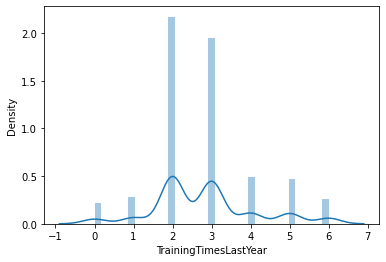

In [100]:
sns.distplot(hr['TrainingTimesLastYear'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='Density'>

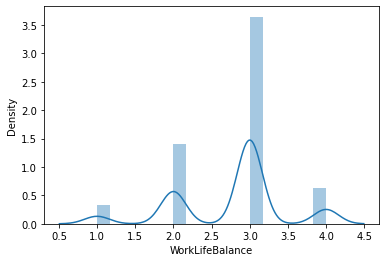

In [101]:
sns.distplot(hr['WorkLifeBalance'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='YearsAtCompany', ylabel='Density'>

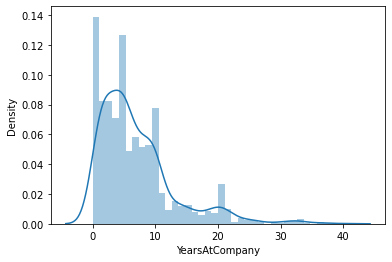

In [102]:
sns.distplot(hr['YearsAtCompany'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Density'>

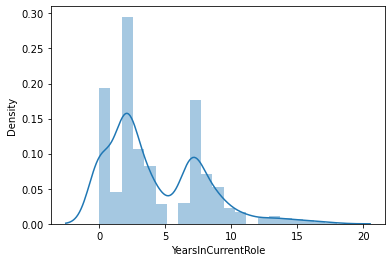

In [103]:
sns.distplot(hr['YearsInCurrentRole'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

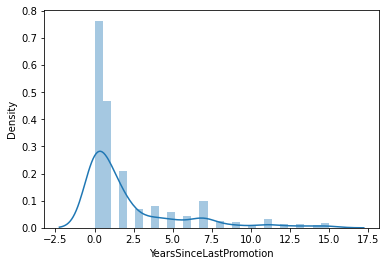

In [104]:
sns.distplot(hr['YearsSinceLastPromotion'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

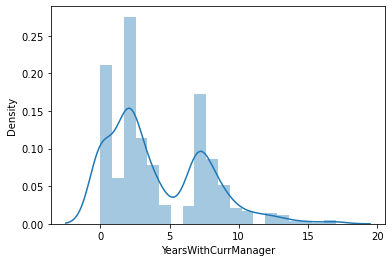

In [105]:
sns.distplot(hr['YearsWithCurrManager'])

The data of the column is not normalised. The building blocks are out of the normalized curve.

# Data Cleaning:

In [106]:
hr=hr.drop(["Over18","EmployeeCount","EmployeeNumber","StandardHours"],axis=1)

In [107]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


# Removing Outliers:

# z-Score Technique:

In [108]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(hr))
z.shape

(1470, 31)

In [109]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

In [110]:
hr_new=hr[(z<3).all(axis=1)]
print(hr.shape)
print(hr_new.shape)

(1470, 31)
(1387, 31)


Perecentage Data Loss:

In [111]:
percentage_loss=(1470-1387)/1470*100
print(percentage_loss)

5.646258503401361


# IQR Technique:

In [112]:
Q1 = hr.quantile(0.25)
Q3 = hr.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Age                            13.00
Attrition                       0.00
BusinessTravel                  1.00
DailyRate                     692.00
Department                      1.00
DistanceFromHome               12.00
Education                       2.00
EducationField                  2.00
EnvironmentSatisfaction         2.00
Gender                          1.00
HourlyRate                     35.75
JobInvolvement                  1.00
JobLevel                        2.00
JobRole                         5.00
JobSatisfaction                 2.00
MaritalStatus                   1.00
MonthlyIncome                5468.00
MonthlyRate                 12414.50
NumCompaniesWorked              3.00
OverTime                        1.00
PercentSalaryHike               6.00
PerformanceRating               0.00
RelationshipSatisfaction        2.00
StockOptionLevel                1.00
TotalWorkingYears               9.00
TrainingTimesLastYear           1.00
WorkLifeBalance                 1.00
Y

In [113]:
hr_new1= hr[~((hr < (Q1 - 1.5 * IQR)) |(hr > (Q3 + 1.5 * IQR))).any(axis=1)]
print(hr_new1.shape)

(641, 31)


Percentage Data Loss:

In [114]:
percentage_loss=((1470-641)/1470)*100
print(percentage_loss)

56.394557823129254


The percentage loss in the z-score is less, so we prefer z-score over IQR.

# Dividing dataframe into feature and target:

In [115]:
x=hr_new.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
y=hr_new.iloc[:,1]

In [116]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime
0,41,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1
1,49,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0
2,37,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1
3,33,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1
4,27,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,4,2,2,4,1,2571,12290,4,0
1466,39,2,613,1,6,1,3,4,1,42,2,3,0,1,1,9991,21457,4,0
1467,27,2,155,1,4,3,1,2,1,87,4,2,4,2,1,6142,5174,1,1
1468,49,1,1023,2,2,3,3,4,1,63,2,2,7,2,1,5390,13243,2,0


In [117]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1387, dtype: int32

In [118]:
y.value_counts()

0    1158
1     229
Name: Attrition, dtype: int64

In [119]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
xtrain,ytrain=sm.fit_resample(x,y)

In [120]:
ytrain.value_counts()

0    1158
1    1158
Name: Attrition, dtype: int64

# Transforming data to remove skewness:

In [121]:
from sklearn.preprocessing import power_transform
xtrain=power_transform(xtrain,method='yeo-johnson')
xtrain

array([[ 0.75175077,  0.77398939,  0.85873859, ...,  0.71118361,
         1.70413041,  1.55594823],
       [ 1.48433551, -1.10123536, -1.38252937, ...,  1.37301345,
        -0.62091084, -0.64269491],
       [ 0.33268946,  0.77398939,  1.45824454, ..., -1.90619524,
         1.3174614 ,  1.55594823],
       ...,
       [-0.51652636, -1.10123536, -1.18842395, ...,  0.50918465,
         0.0084469 , -0.64269491],
       [-2.32968114, -1.79749466, -0.69420891, ..., -1.20001975,
        -0.62091084, -0.64269491],
       [-0.2562191 ,  0.77398939, -0.47880566, ...,  1.04740383,
         0.4538263 , -0.64269491]])

In [122]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtrain

array([[ 0.75175077,  0.77398939,  0.85873859, ...,  0.71118361,
         1.70413041,  1.55594823],
       [ 1.48433551, -1.10123536, -1.38252937, ...,  1.37301345,
        -0.62091084, -0.64269491],
       [ 0.33268946,  0.77398939,  1.45824454, ..., -1.90619524,
         1.3174614 ,  1.55594823],
       ...,
       [-0.51652636, -1.10123536, -1.18842395, ...,  0.50918465,
         0.0084469 , -0.64269491],
       [-2.32968114, -1.79749466, -0.69420891, ..., -1.20001975,
        -0.62091084, -0.64269491],
       [-0.2562191 ,  0.77398939, -0.47880566, ...,  1.04740383,
         0.4538263 , -0.64269491]])

# MODEL BUILDING:

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Logistic Regression:

In [124]:
for i in range(0,1000):
    train_x,test_x,train_y,test_y=train_test_split(xtrain,ytrain,test_size=0.20,random_state=i)
    lg.fit(train_x,train_y)
    pred_train=lg.predict(train_x)
    pred_test=lg.predict(test_x)
    if round(accuracy_score(train_y,pred_train)*100,1)==round(accuracy_score(test_y,pred_test)*100,1):
        print("At random state",i,"The model performs well")
        print("At random state:",i)
        print("Training Accuracy:",accuracy_score(train_y,pred_train)*100)
        print("Testing Accuracy:",accuracy_score(test_y,pred_test)*100)

At random state 32 The model performs well
At random state: 32
Training Accuracy: 78.18574514038878
Testing Accuracy: 78.23275862068965
At random state 227 The model performs well
At random state: 227
Training Accuracy: 77.96976241900649
Testing Accuracy: 78.01724137931035
At random state 399 The model performs well
At random state: 399
Training Accuracy: 78.7257019438445
Testing Accuracy: 78.66379310344827
At random state 440 The model performs well
At random state: 440
Training Accuracy: 78.40172786177105
Testing Accuracy: 78.44827586206897
At random state 616 The model performs well
At random state: 616
Training Accuracy: 78.40172786177105
Testing Accuracy: 78.44827586206897
At random state 698 The model performs well
At random state: 698
Training Accuracy: 78.40172786177105
Testing Accuracy: 78.44827586206897
At random state 708 The model performs well
At random state: 708
Training Accuracy: 78.94168466522679
Testing Accuracy: 78.87931034482759
At random state 711 The model perform

In [125]:
train_x,test_x,train_y,test_y=train_test_split(xtrain,ytrain,test_size=0.20,random_state=807)
print("Classification Report:",classification_report(test_y,pred_test))
print("Confusion Matrix:",confusion_matrix(test_y,pred_test))

Classification Report:               precision    recall  f1-score   support

           0       0.47      0.50      0.48       224
           1       0.51      0.49      0.50       240

    accuracy                           0.49       464
   macro avg       0.49      0.49      0.49       464
weighted avg       0.49      0.49      0.49       464

Confusion Matrix: [[111 113]
 [123 117]]


Cross validation score for Logistic Regression:

In [126]:
from sklearn.model_selection import cross_val_score

lg.fit(train_x,train_y)
lg.score(train_x,train_y)
pred_lg = lg.predict(test_x)

lss = accuracy_score(test_y,pred_lg)
for j in range(2,10):
    lsscore = cross_val_score(lg,xtrain,ytrain,cv=j)
    ls_cv = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",ls_cv*100 )
    print("Accuracy score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 76.16580310880829
Accuracy score is :- 79.95689655172413


At cv:- 3
Cross validation score is:- 76.5112262521589
Accuracy score is :- 79.95689655172413


At cv:- 4
Cross validation score is:- 76.55440414507773
Accuracy score is :- 79.95689655172413


At cv:- 5
Cross validation score is:- 76.29999255231995
Accuracy score is :- 79.95689655172413


At cv:- 6
Cross validation score is:- 76.5112262521589
Accuracy score is :- 79.95689655172413


At cv:- 7
Cross validation score is:- 77.03090464419769
Accuracy score is :- 79.95689655172413


At cv:- 8
Cross validation score is:- 77.50551843455436
Accuracy score is :- 79.95689655172413


At cv:- 9
Cross validation score is:- 77.46408067645964
Accuracy score is :- 79.95689655172413




In [127]:
print("At cv:",8)
print("Cross validation score is:", 76.68670206419281)
print("Accuracy score is :",78.23275862068965)

At cv: 8
Cross validation score is: 76.68670206419281
Accuracy score is : 78.23275862068965


The value of cv taken is 8

# Approaching more classifiers:

In [128]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# 1.Decision Tree Classifier:

In [129]:
parameters = {'criterion':['gini', 'entropy'],'splitter':['best','random']}
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'entropy', 'splitter': 'best'}


In [130]:
dtc = DecisionTreeClassifier(criterion='gini', splitter='best')
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
pred_dtc = dtc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_dtc)*100)
print("Classification report:",classification_report(test_y,pred_dtc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_dtc)*100)

dtc_score = cross_val_score(dtc,xtrain,ytrain,cv=8)
dtc_cc = dtc_score.mean() 
print('Cross Val Score:',dtc_cc*100)

Accuracy Score: 82.11206896551724
Classification report:               precision    recall  f1-score   support

           0       0.84      0.77      0.81       224
           1       0.80      0.87      0.83       240

    accuracy                           0.82       464
   macro avg       0.82      0.82      0.82       464
weighted avg       0.82      0.82      0.82       464
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       224
           1       0.80      0.87      0.83       240

    accuracy                           0.82       464
   macro avg       0.82      0.82      0.82       464
weighted avg       0.82      0.82      0.82       464
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       224
           1       0.80      0.87      0.83       240

    accuracy                           0.82       464
   macro avg       0.82      0.82      0.82       464
weighted avg       

# 2.KNeighbors Classifier:

In [131]:
parameters = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'algorithm': 'auto'}


In [132]:
knc = KNeighborsClassifier(algorithm='auto', n_neighbors=5)
knc.fit(train_x,train_y)
knc.score(train_x,train_y)
pred_knc = knc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_knc)*100)
print("Classification report:",classification_report(test_y,pred_knc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_knc)*100)

knc_score = cross_val_score(knc,xtrain,ytrain,cv=8)
knc_cc = knc_score.mean() 
print('Cross Val Score:',knc_cc*100)

Accuracy Score: 79.3103448275862
Classification report:               precision    recall  f1-score   support

           0       0.94      0.61      0.74       224
           1       0.72      0.97      0.83       240

    accuracy                           0.79       464
   macro avg       0.83      0.79      0.78       464
weighted avg       0.83      0.79      0.79       464
              precision    recall  f1-score   support

           0       0.94      0.61      0.74       224
           1       0.72      0.97      0.83       240

    accuracy                           0.79       464
   macro avg       0.83      0.79      0.78       464
weighted avg       0.83      0.79      0.79       464
              precision    recall  f1-score   support

           0       0.94      0.61      0.74       224
           1       0.72      0.97      0.83       240

    accuracy                           0.79       464
   macro avg       0.83      0.79      0.78       464
weighted avg       0

# 3.SVC:

In [133]:
svc = SVC(kernel='poly')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
pred_svc = svc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_svc)*100)
print("Classification report:",classification_report(test_y,pred_svc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_svc)*100)

svc_score = cross_val_score(svc,xtrain,ytrain,cv=8)
svc_cc = svc_score.mean() 
print('Cross Val Score:',svc_cc*100)

Accuracy Score: 86.42241379310344
Classification report:               precision    recall  f1-score   support

           0       0.89      0.82      0.85       224
           1       0.84      0.90      0.87       240

    accuracy                           0.86       464
   macro avg       0.87      0.86      0.86       464
weighted avg       0.87      0.86      0.86       464
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       224
           1       0.84      0.90      0.87       240

    accuracy                           0.86       464
   macro avg       0.87      0.86      0.86       464
weighted avg       0.87      0.86      0.86       464
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       224
           1       0.84      0.90      0.87       240

    accuracy                           0.86       464
   macro avg       0.87      0.86      0.86       464
weighted avg       

# ENSEMBLE METHODS:

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 1.Random Forest Classifier:

In [135]:
parameters = {'criterion':['gini', 'entropy'],'n_estimators':[100]}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'entropy', 'n_estimators': 100}


In [136]:
rfc = RandomForestClassifier(criterion='gini', n_estimators=100)
rfc.fit(train_x,train_y)
rfc.score(train_x,train_y)
pred_rfc = rfc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_rfc)*100)
print("Classification report:",classification_report(test_y,pred_rfc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_rfc)*100)

rfc_score = cross_val_score(rfc,xtrain,ytrain,cv=8)
rfc_cc = rfc_score.mean() 
print('Cross Val Score:',rfc_cc*100)

Accuracy Score: 91.16379310344827
Classification report:               precision    recall  f1-score   support

           0       0.92      0.90      0.91       224
           1       0.91      0.93      0.92       240

    accuracy                           0.91       464
   macro avg       0.91      0.91      0.91       464
weighted avg       0.91      0.91      0.91       464
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       224
           1       0.91      0.93      0.92       240

    accuracy                           0.91       464
   macro avg       0.91      0.91      0.91       464
weighted avg       0.91      0.91      0.91       464
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       224
           1       0.91      0.93      0.92       240

    accuracy                           0.91       464
   macro avg       0.91      0.91      0.91       464
weighted avg       

# 2.Ada Boost Classifier:

In [137]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME')
abc.fit(train_x,train_y)
abc.score(train_x,train_y)
pred_abc = abc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_abc)*100)
print("Classification report:",classification_report(test_y,pred_abc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_abc)*100)

abc_score = cross_val_score(abc,xtrain,ytrain,cv=8)
abc_cc = abc_score.mean() 
print('Cross Val Score:',abc_cc*100)

Accuracy Score: 82.75862068965517
Classification report:               precision    recall  f1-score   support

           0       0.83      0.81      0.82       224
           1       0.83      0.85      0.84       240

    accuracy                           0.83       464
   macro avg       0.83      0.83      0.83       464
weighted avg       0.83      0.83      0.83       464
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       224
           1       0.83      0.85      0.84       240

    accuracy                           0.83       464
   macro avg       0.83      0.83      0.83       464
weighted avg       0.83      0.83      0.83       464
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       224
           1       0.83      0.85      0.84       240

    accuracy                           0.83       464
   macro avg       0.83      0.83      0.83       464
weighted avg       

# 3.Gradient Boosting Classifier:

In [138]:
gbc = GradientBoostingClassifier(criterion='mse', n_estimators=100, learning_rate=0.1, loss='deviance')
gbc.fit(train_x,train_y)
gbc.score(train_x,train_y)
pred_gbc = gbc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_gbc)*100)
print("Classification report:",classification_report(test_y,pred_gbc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_gbc)*100)

gbc_score = cross_val_score(gbc,xtrain,ytrain,cv=8)
gbc_cc = gbc_score.mean() 
print('Cross Val Score:',gbc_cc*100)

Accuracy Score: 86.63793103448276
Classification report:               precision    recall  f1-score   support

           0       0.88      0.84      0.86       224
           1       0.86      0.89      0.87       240

    accuracy                           0.87       464
   macro avg       0.87      0.87      0.87       464
weighted avg       0.87      0.87      0.87       464
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       224
           1       0.86      0.89      0.87       240

    accuracy                           0.87       464
   macro avg       0.87      0.87      0.87       464
weighted avg       0.87      0.87      0.87       464
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       224
           1       0.86      0.89      0.87       240

    accuracy                           0.87       464
   macro avg       0.87      0.87      0.87       464
weighted avg       

# 4.Voting Classifier:

In [139]:
from sklearn.ensemble import VotingClassifier

In [140]:
estimator=[]
estimator.append(('LR',KNeighborsClassifier()))
estimator.append(('SVC',SVC(gamma='auto',probability=True)))
estimator.append(('DTC',DecisionTreeClassifier()))

In [141]:
estimator

[('LR', KNeighborsClassifier()),
 ('SVC', SVC(gamma='auto', probability=True)),
 ('DTC', DecisionTreeClassifier())]

In [142]:
#voting classifier with hard voting
vot_hard=VotingClassifier(estimators=estimator,voting='hard')
vot_hard.fit(train_x,train_y)
y_pred=vot_hard.predict(test_x)
print(y_pred)
score=accuracy_score(test_y,y_pred)
print("Hard Voting Score %d" %score)

[1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0
 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0
 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0
 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0
 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0
 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1
 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1
 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1]
Hard Voting Score 0


In [143]:
#voting classifier with soft voting
vot_soft=VotingClassifier(estimators=estimator,voting='soft')
vot_soft.fit(train_x,train_y)
y_pred=vot_soft.predict(test_x)
print(y_pred)
score=accuracy_score(test_y,y_pred)
print("soft Voting Score %d" %score)

[1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1
 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0
 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0
 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0
 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1
 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 1 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0
 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1
 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0
 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1
 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1
 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1]
soft Voting Score 0


# The best model is Random Forest Classifier. Since the difference between the percentage score of cross validation and accuracy_score is optimum.

# AUC ROC Curve:

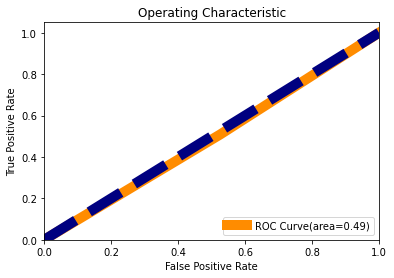

In [144]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_test,test_y)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Model Saving:

In [145]:
import pickle
filename='hr_analytics_report.pkl'
pickle.dump(rfc,open(filename,'wb'))

# Conclusion:

In [146]:
import numpy as np
a=np.array(test_y)
predicted=np.array(rfc.predict(test_x))
hr_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
hr_com

,original,predicted
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
459,0,0
460,0,0
461,1,1
462,0,0


# From the above table, the model is predicted with 89 percent accuracy.